![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Sarcasm Detection

## Description

Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.

In hands-on project, the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.

## Datasets

### News Headlines dataset for Sarcasm Detection

The dataset is collected from two new websites, theonion.com and huffingtonpost.com. This new dataset has the following advantages over the existing Twitter datasets:

Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of the finding the pre-trained embeddings. Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets.

Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in teasing apart the real sarcastic elements.

### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Content

Each record consists of three attributes:
- is_sarcastic: 1 if the record is sarcastic otherwise 0
- headline: the headline of the news article
- article_link: link to the original news article. Useful in collecting supplementary data


## Implementation Steps

Instructions to perform all the below steps are mentioned in the question notebook with the respective marks.

1. Read and explore the data
2. Drop one column
3. Get length of each sentence
4. Define parameters
5. Get indices for words
6. Create features and labels
7. Get vocab size
8. Create a weight matrix using GloVe embeddings
9. Define and compile a Bidrectional LSTM model
10. Fit the model and check the validation accuracy

### Package Version:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

# Sarcasm Detection

Upload Python file from the following link: https://github.com/jimitpatel/AIML/blob/master/googledriveloaddata.py

In [1]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving googledriveloaddata.py to googledriveloaddata.py


### Load Data (3 Marks)

In [2]:
!pip install -U -q PyDrive
from googledriveloaddata import DatasetLoader

In [3]:
def download_data(url, name):
  dataloader = DatasetLoader(url)
  dataloader.load_data(name)

In [5]:
sarcasm_headlines_data_json = "https://drive.google.com/file/d/1LWVnOp1rw4g9SYswuf8IPAHBoOnWOTF0/view?usp=sharing"
download_data(sarcasm_headlines_data_json, "Sarcasm_Headlines_Dataset.json")

In [6]:
import pandas as pd

In [7]:
data = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [8]:
data.dropna(inplace=True)

In [9]:
import re

In [10]:
def  clean_text(df, text_field, new_text_field_name):
  df[new_text_field_name] = df[text_field].str.lower()
  df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
  # remove numbers
  df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    
  return df

In [11]:
data_clean = clean_text(data, 'headline', 'headline_clean')

Since, we are classifying the headlines, stopwords are not bothersome, and therefore we can remove them from headlines

In [12]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stopwords(df, text_field):
  stop = stopwords.words('english')
  df[text_field] = df[text_field].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
  return df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
data_clean = remove_stopwords(data_clean, 'headline_clean')
data_clean.head()

,article_link,headline,is_sarcastic,headline_clean
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,former versace store clerk sues secret black c...
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,roseanne revival catches thorny political mood...
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,mom starting fear sons web series closest thin...
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,boehner wants wife listen come alternative deb...
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,jk rowling wishes snape happy birthday magical...


In [14]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26709 entries, 0 to 26708
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   article_link    26709 non-null  object
 1   headline        26709 non-null  object
 2   is_sarcastic    26709 non-null  int64 
 3   headline_clean  26709 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


### Drop `article_link` from dataset (3 Marks)

In [15]:
data_clean.drop(['article_link'], axis=1, inplace=True)
data_clean.head()

,headline,is_sarcastic,headline_clean
0,former versace store clerk sues over secret 'b...,0,former versace store clerk sues secret black c...
1,the 'roseanne' revival catches up to our thorn...,0,roseanne revival catches thorny political mood...
2,mom starting to fear son's web series closest ...,1,mom starting fear sons web series closest thin...
3,"boehner just wants wife to listen, not come up...",1,boehner wants wife listen come alternative deb...
4,j.k. rowling wishes snape happy birthday in th...,0,jk rowling wishes snape happy birthday magical...


### Get length of each headline and add a column for that (3 Marks)

In [16]:
data_clean['headline_length'] = data_clean['headline_clean'].str.len()
data_clean.head(10)

,headline,is_sarcastic,headline_clean,headline_length
0,former versace store clerk sues over secret 'b...,0,former versace store clerk sues secret black c...,67
1,the 'roseanne' revival catches up to our thorn...,0,roseanne revival catches thorny political mood...,59
2,mom starting to fear son's web series closest ...,1,mom starting fear sons web series closest thin...,58
3,"boehner just wants wife to listen, not come up...",1,boehner wants wife listen come alternative deb...,62
4,j.k. rowling wishes snape happy birthday in th...,0,jk rowling wishes snape happy birthday magical...,50
5,advancing the world's women,0,advancing worlds women,22
6,the fascinating case for eating lab-grown meat,0,fascinating case eating labgrown meat,37
7,"this ceo will send your kids to school, if you...",0,ceo send kids school work company,33
8,top snake handler leaves sinking huckabee camp...,1,top snake handler leaves sinking huckabee camp...,50
9,friday's morning email: inside trump's presser...,0,fridays morning email inside trumps presser ages,48


In [17]:
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
is_sarcastic,26709.0,0.438953,0.496269,0.0,0.0,0.0,1.0,1.0
headline_length,26709.0,48.878393,16.741183,0.0,37.0,49.0,60.0,227.0


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


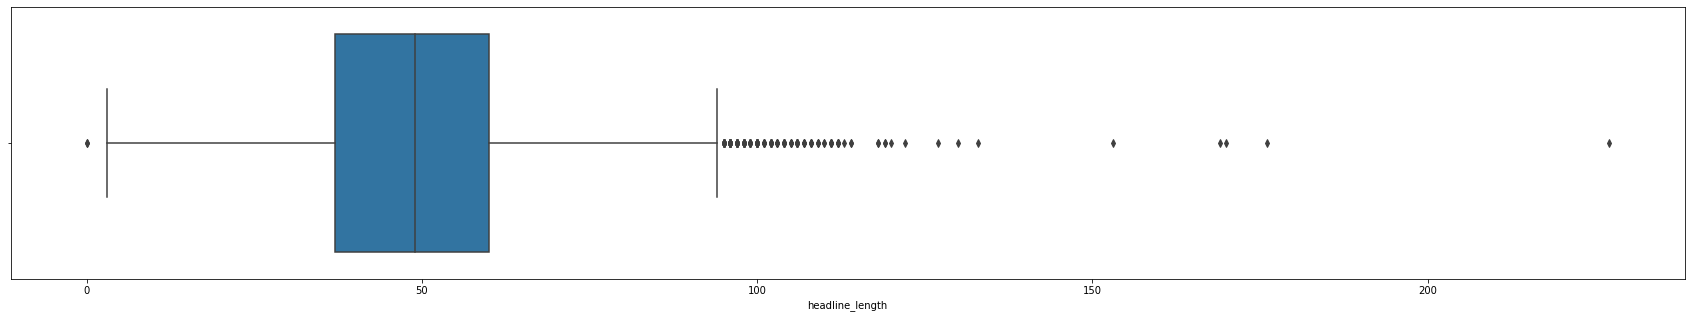

In [19]:
size = (30,5)
fig, ax = plt.subplots(figsize=size)
sns.boxplot(data_clean['headline_length'], ax=ax)

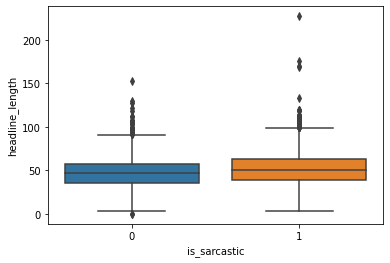

In [20]:
sns.boxplot(data=data_clean, y='headline_length', x='is_sarcastic')

### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [37]:
max_features = 10000
maxlen = 25
embedding_size = 300

### Apply `tensorflow.keras` Tokenizer and get indices for words (3 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [39]:
UNKNOWN = "<unknown>"
PADDING = "<padding>"

def tokenize(sentences, max_feat):
  tokenizer = Tokenizer(num_words=max_feat, lower=True, oov_token=UNKNOWN)
  tokenizer.fit_on_texts(sentences)
  tokenizer.word_index[PADDING] = 0
  tokenizer.index_word[0] = PADDING

  sequences = tokenizer.texts_to_sequences(sentences)
  maxlen = max([len(x) for x in sequences])
  return tokenizer, sequences, maxlen

In [40]:
tokenizer, sequences, maxlen = tokenize(data_clean['headline_clean'], max_features)

### Pad sequences (3 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [42]:
def pad_sentences(sentences, maxlen):
  return pad_sequences(sentences, maxlen=maxlen, padding='post').tolist()

def reshape_sentences(sentences, maxlen):
  return sentences.reshape(len(sentences), maxlen, 1)

In [43]:
X = pad_sentences(sequences, maxlen)

print("Word index:\n", tokenizer.word_index)
print("\nsequences:\n", sequences)
print("\nPadded sequences:\n", X[10])
print("Sequences data type:", type(sequences))
print("Padded sequences data type:", type(X))

Word index:
 {'<unknown>': 1, 'new': 2, 'trump': 3, 'man': 4, 'us': 5, 'report': 6, 'one': 7, 'area': 8, 'donald': 9, 'says': 10, 'day': 11, 'woman': 12, 'time': 13, 'first': 14, 'like': 15, 'get': 16, 'trumps': 17, 'people': 18, 'obama': 19, 'house': 20, 'life': 21, 'make': 22, 'still': 23, 'women': 24, 'white': 25, 'back': 26, 'clinton': 27, 'world': 28, 'years': 29, 'could': 30, 'family': 31, 'americans': 32, 'way': 33, 'black': 34, 'gop': 35, 'study': 36, 'year': 37, 'bill': 38, 'yearold': 39, 'would': 40, 'best': 41, 'police': 42, 'watch': 43, 'really': 44, 'american': 45, 'show': 46, 'school': 47, 'cant': 48, 'know': 49, 'things': 50, 'good': 51, 'home': 52, 'death': 53, 'president': 54, 'finds': 55, 'say': 56, 'video': 57, 'nation': 58, 'going': 59, 'love': 60, 'health': 61, 'last': 62, 'state': 63, 'hillary': 64, 'big': 65, 'parents': 66, 'may': 67, 'every': 68, 'mom': 69, 'kids': 70, 'campaign': 71, 'need': 72, 'gets': 73, 'getting': 74, 'party': 75, 'little': 76, 'work': 77, 

In [44]:
import numpy as np

In [45]:
X = np.asarray(X)
X = reshape_sentences(X, maxlen)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(26709, 26, 1)


In [46]:
Y = np.asarray(data_clean['is_sarcastic']).astype(np.float32)
type(Y)

numpy.ndarray

### Vocab mapping
- There is no word for 0th index

In [47]:
tokenizer.word_index

{'<unknown>': 1,
 'new': 2,
 'trump': 3,
 'man': 4,
 'us': 5,
 'report': 6,
 'one': 7,
 'area': 8,
 'donald': 9,
 'says': 10,
 'day': 11,
 'woman': 12,
 'time': 13,
 'first': 14,
 'like': 15,
 'get': 16,
 'trumps': 17,
 'people': 18,
 'obama': 19,
 'house': 20,
 'life': 21,
 'make': 22,
 'still': 23,
 'women': 24,
 'white': 25,
 'back': 26,
 'clinton': 27,
 'world': 28,
 'years': 29,
 'could': 30,
 'family': 31,
 'americans': 32,
 'way': 33,
 'black': 34,
 'gop': 35,
 'study': 36,
 'year': 37,
 'bill': 38,
 'yearold': 39,
 'would': 40,
 'best': 41,
 'police': 42,
 'watch': 43,
 'really': 44,
 'american': 45,
 'show': 46,
 'school': 47,
 'cant': 48,
 'know': 49,
 'things': 50,
 'good': 51,
 'home': 52,
 'death': 53,
 'president': 54,
 'finds': 55,
 'say': 56,
 'video': 57,
 'nation': 58,
 'going': 59,
 'love': 60,
 'health': 61,
 'last': 62,
 'state': 63,
 'hillary': 64,
 'big': 65,
 'parents': 66,
 'may': 67,
 'every': 68,
 'mom': 69,
 'kids': 70,
 'campaign': 71,
 'need': 72,
 'gets':

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [48]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

27497


### Load Glove Word Embeddings (3 Marks)

In [34]:
# glove_6b50d = "https://drive.google.com/file/d/18GuqTZgeVMXT3tipPN9yqEieEl2X48Y6/view?usp=sharing"
# glove_6b100d = "https://drive.google.com/file/d/1-0H7tsrlR8gSxT5acOfHP1LgzSjn827O/view?usp=sharing"
# glove_6b200d = "https://drive.google.com/file/d/1-D_BcOzgr0csjiG-Fd2LRJrf7odapC9A/view?usp=sharing"
glove_6b300d = "https://drive.google.com/file/d/1-JzJ5MIVuKG6Vhg5tA1ATh185WmXUqWL/view?usp=sharing"

# download_data(glove_6b50d, "glove.6b.50d.txt")
# download_data(glove_6b100d, "glove.6b.100d.txt")
# download_data(glove_6b200d, "glove.6b.200d.txt")
download_data(glove_6b300d, "glove.6b.300d.txt")

### Create embedding matrix

In [49]:
EMBEDDING_FILE = f'./glove.6b.{str(embedding_size)}d.txt'
embeddings = {}
for o in open(EMBEDDING_FILE):
  word = o.split(" ")[0]
  # print(word)
  embd = o.split(" ")[1:]
  embd = np.asarray(embd, dtype='float32')
  # print(embd)
  embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, embedding_size))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

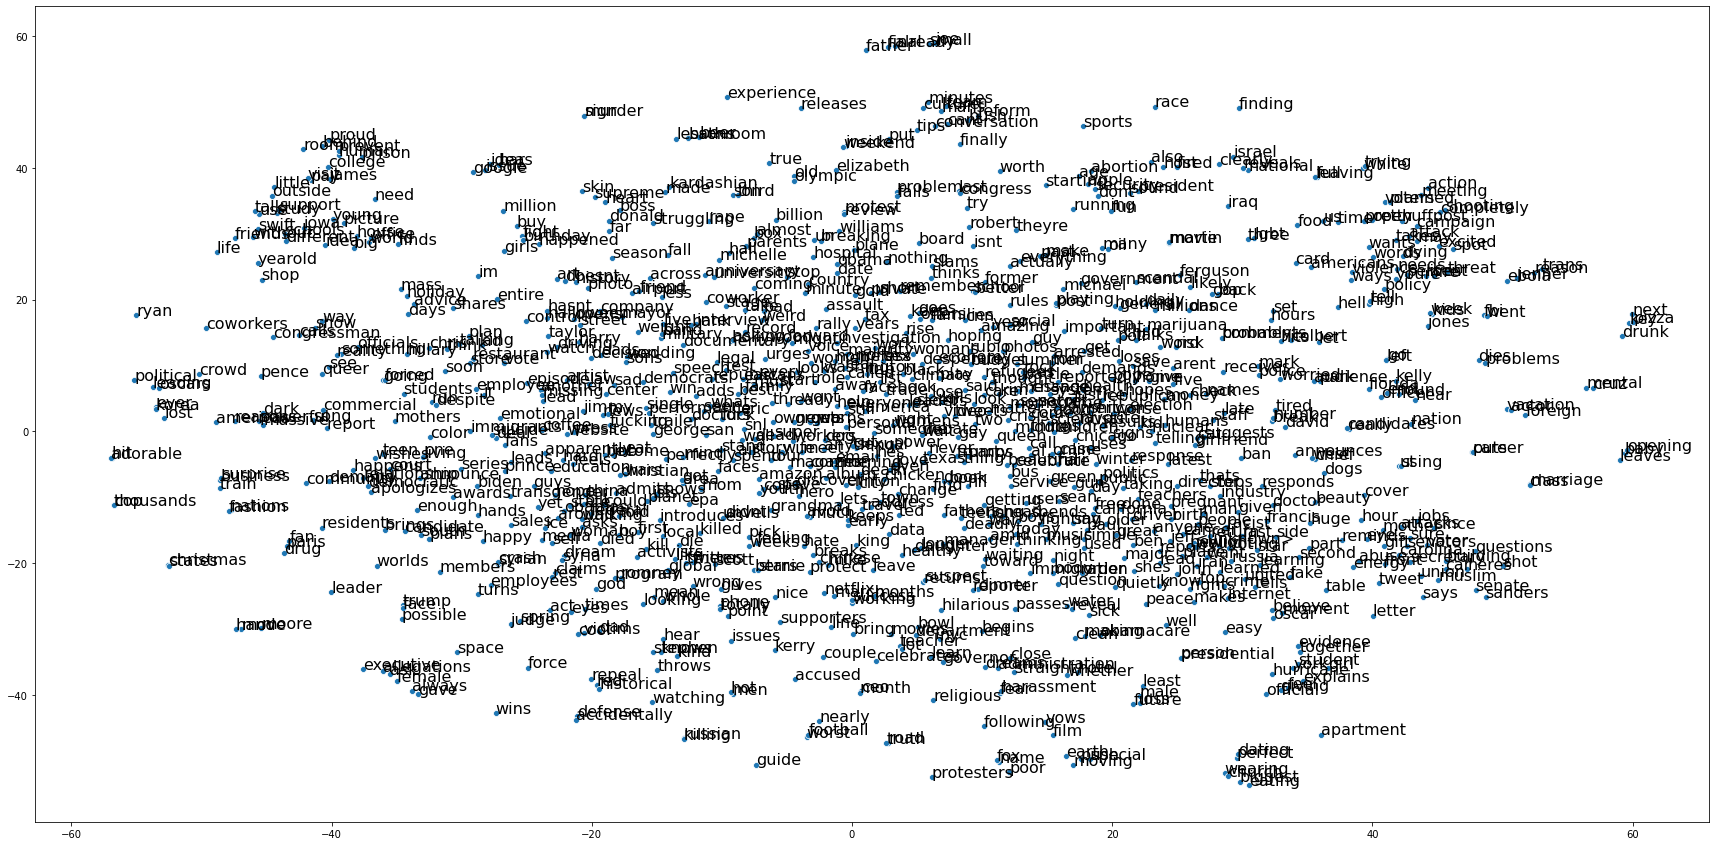

In [50]:
from sklearn.manifold import TSNE

PLOT_LIMIT = 1000
tokens = list(tokenizer.word_index.keys())
tsne = TSNE(n_components=2, random_state=0)
target = tsne.fit_transform(embedding_matrix[:PLOT_LIMIT])

size = (30,15)
fig, ax = plt.subplots(figsize=size)
ax = sns.scatterplot(target[:, 0], target[:, 1])
for label, x, y in zip(tokens, target[:, 0], target[:, 1]):
  ax.text(x, y, label, fontsize=16)

### Define model (5 Marks)
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [103]:
print(f"Training shape: X={X_train.shape}, Y={Y_train.shape}")
print(f"Testing shape: X={X_test.shape}, Y={Y_test.shape}")

Training shape: X=(18696, 26, 1), Y=(18696,)
Testing shape: X=(8013, 26, 1), Y=(8013,)


### Compile the model (3 Marks)

In [104]:
from keras.models import Sequential
from keras import Model
from keras.layers import Dense, Embedding, LSTM, Bidirectional, Input, Flatten
from keras import backend as K

In [122]:
def build_model():
  K.clear_session()
  input = Input(shape=(maxlen,))
  model = Embedding(num_words, output_dim=OUTPUT_DIM, weights=[embedding_matrix], input_length=maxlen, trainable=False)(input)
  model = Bidirectional(LSTM(units=100, return_sequences=True, dropout=0.4), merge_mode='concat')(model)
  model = Flatten()(model)
  output = Dense(2, activation='softmax')(model)
  model = Model(input, output)
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [123]:
model = build_model()
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 26)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 26, 300)           8249100   
_________________________________________________________________
bidirectional (Bidirectional (None, 26, 200)           320800    
_________________________________________________________________
flatten (Flatten)            (None, 5200)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 10402     
Total params: 8,580,302
Trainable params: 331,202
Non-trainable params: 8,249,100
_________________________________________________________________
None


### Fit the model (4 Marks)

In [124]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
stop = EarlyStopping(monitor="val_accuracy", patience=2, mode="auto")
reduce_lr = ReduceLROnPlateau(monitor="val_accuracy", factor=0.001, patience=5, min_lr=1e-10, verbose=1, mode="auto")

In [125]:
history = model.fit(x=X_train, y=Y_train, batch_size=1000, epochs=100, verbose=2, validation_split=0.2, callbacks=[reduce_lr, stop])

Epoch 1/100
15/15 - 2s - loss: 0.6224 - accuracy: 0.6493 - val_loss: 0.5422 - val_accuracy: 0.7246
Epoch 2/100
15/15 - 1s - loss: 0.5415 - accuracy: 0.7251 - val_loss: 0.4951 - val_accuracy: 0.7548
Epoch 3/100
15/15 - 1s - loss: 0.5036 - accuracy: 0.7501 - val_loss: 0.4737 - val_accuracy: 0.7730
Epoch 4/100
15/15 - 1s - loss: 0.4795 - accuracy: 0.7666 - val_loss: 0.4594 - val_accuracy: 0.7829
Epoch 5/100
15/15 - 1s - loss: 0.4588 - accuracy: 0.7812 - val_loss: 0.4685 - val_accuracy: 0.7773
Epoch 6/100
15/15 - 1s - loss: 0.4391 - accuracy: 0.7905 - val_loss: 0.4390 - val_accuracy: 0.7947
Epoch 7/100
15/15 - 1s - loss: 0.4215 - accuracy: 0.8003 - val_loss: 0.4318 - val_accuracy: 0.7963
Epoch 8/100
15/15 - 1s - loss: 0.3993 - accuracy: 0.8114 - val_loss: 0.4208 - val_accuracy: 0.8000
Epoch 9/100
15/15 - 1s - loss: 0.3859 - accuracy: 0.8190 - val_loss: 0.4183 - val_accuracy: 0.8118
Epoch 10/100
15/15 - 1s - loss: 0.3661 - accuracy: 0.8335 - val_loss: 0.4163 - val_accuracy: 0.8123
Epoch 11/

In [126]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=2)
print('Accuracy: %f'%(accuracy * 100))
print('Loss: %f'%(loss * 100))

251/251 - 1s - loss: 0.4240 - accuracy: 0.8162
Accuracy: 81.617373
Loss: 42.402548


In [127]:
from sklearn.metrics import classification_report,confusion_matrix

In [128]:
Y_pred = model.predict(X_test)
y_pred = np.array([np.argmax(pred) for pred in Y_pred])
print('Classification Report:\n', classification_report(Y_test, y_pred),'\n')

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      4542
         1.0       0.79      0.79      0.79      3471

    accuracy                           0.82      8013
   macro avg       0.81      0.81      0.81      8013
weighted avg       0.82      0.82      0.82      8013
 



In [129]:
history_dict = history.history

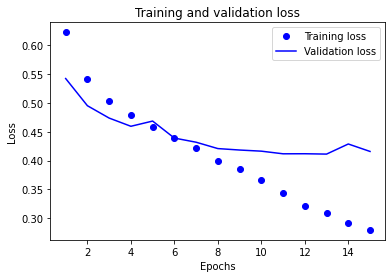

In [130]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

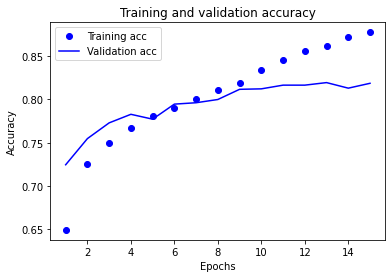

In [131]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, (len(history_dict['accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [132]:
def data_preprocess(sentence):
  sentence = sentence.lower()
  sentence = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", sentence)  
  # remove numbers
  sentence = re.sub(r"\d+", "", sentence)

  stop = stopwords.words('english')
  sentence = ' '.join([word for word in sentence.split() if word not in (stop)])
  return sentence

def feat_engg(sentence):
  ids = []
  for word in sentence.split():
    if word in tokenizer.word_index.keys():
      ids.append(tokenizer.word_index[word])
    else:
      ids.append(tokenizer.word_index[UNKNOWN])
  sentence = pad_sentences([ids], maxlen)
  return sentence

def predict(sentence):
  sent = data_preprocess(sentence)
  feature = feat_engg(sent)
  prediction = np.argmax(feature)
  if prediction > 0:
    return "Sarcastic"
  else:
    return "Not Sarcastic"

In [133]:
sentence = "I love those mustard stains on your oversized hoodie. They really bring out the color in your eyes."
print(predict(sentence)) # Actual Sarcastic

Sarcastic


In [135]:
print(predict("Wednesday is wine night, so order any entrée off the menu and receive a free glass of wine to complement your meal.")) # Actual Not Sarcastic

Not Sarcastic


In [136]:
print(predict("I work 40 hours a week for us to be this poor.")) # Actual Sarcastic

Sarcastic


In [137]:
print(predict("Nice perfume. How long did you marinate in it?")) # Actual Sarcastic

Not Sarcastic


In [141]:
print(predict("The Prime Minister was hailed for the points he made about women in his Independence Day address.")) # Actual Not Sarcastic

Sarcastic


In [142]:
print(predict("As The Nepotism Debate Rages, An Honest Look At Some Star Kid Debuts")) # Actual Not Sarcastic

Not Sarcastic


In [147]:
print(predict("Periods Won’t Stop Women From ‘Flying Fighter Jets’, Some Men Will")) # Actual Not Sarcastic

Not Sarcastic
